```markdown
# About Dataset

## Context
This dataset contains detailed records of **776,527 bicycle journeys** from the Transport for London (TfL) Cycle Hire 
system spanning from **August 1 to August 31, 2023**. The TfL Cycle Hire initiative provides publicly accessible bicycles for rent across London, promoting sustainable transportation and physical fitness. This comprehensive dataset captures 
individual trip data, which can be utilized to analyze urban mobility patterns, station performance, and cycling preferences among London's diverse population. It provides a snapshot of cycling activity during the month, including start and end details for each journey, the bicycle used, and the duration of hire.

### Dataset Usage
The dataset can be used for:
1. **Time Series Forecasting**: Predict future bike rental demands based on historical usage patterns.
2. **Geospatial Analysis**: Map the start and end locations of trips to identify popular routes and areas with high 
cycling traffic.
3. **Customer Behavior Analysis**: Analyze the duration and frequency of rentals to understand user preferences and 
habits.
4. **Predictive Maintenance**: Use trip duration and frequency data to predict when bikes are likely to require
maintenance 
or replacement.
5. **Multivariate Analysis**: Explore relationships between different variables, such as trip durations, station
    popularity, and time of day, to uncover underlying patterns in bike usage.

---

## Attribute Information
The dataset includes the following variables for each ride:
1. **Number**: A unique identifier for each trip (Trip ID).
2. **Start Date**: The date and time when the trip began.
3. **Start Station Number**: The identifier for the starting station.
4. **Start Station**: The name of the starting station.
5. **End Date**: The date and time when the trip ended.
6. **End Station Number**: The identifier for the ending station.
7. **End Station**: The name of the ending station.
8. **Bike Number**: A unique identifier for the bicycle used.
9. **Bike Model**: The model of the bicycle used.
10. **Total Duration**: The total time duration of the trip (in a human-readable format).
11. **Total Duration (ms)**: The total time duration of the trip in milliseconds.
```

# Load the dataset and check for preprocessing required

In [1]:
import pandas as pd
df=pd.read_csv("LondonBikeJourneyAug2023.csv")
df

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,8/31/2023 23:59,988,"Great Russell Street, Bloomsbury",9/1/2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,8/31/2023 23:59,2660,"Frith Street, Soho",9/1/2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,8/31/2023 23:59,200190,"Queen's Circus, Battersea Park",9/1/2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,8/31/2023 23:59,959,"Milroy Walk, South Bank",9/1/2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


In [4]:
df.describe()

,Number,Start station number,End station number,Bike number,Total duration (ms)
count,7.765270e+05,7.765270e+05,7.765270e+05,776527.000000,7.765270e+05
mean,1.332250e+08,1.048377e+05,1.044439e+05,49568.888425,1.554986e+06
std,2.307174e+05,1.277670e+05,1.278823e+05,13092.003305,1.729002e+07
min,1.328252e+08,9.590000e+02,9.590000e+02,2.000000,1.307000e+03
25%,1.330252e+08,1.126000e+03,1.123000e+03,50563.000000,4.854690e+05
50%,1.332248e+08,3.467000e+03,3.465000e+03,54625.000000,8.387700e+05
75%,1.334248e+08,2.001800e+05,2.001810e+05,58168.000000,1.392228e+06
max,1.336251e+08,1.100444e+06,1.100444e+06,61201.000000,7.441908e+09


# Converting the object to datetime

In [6]:
df['Start date'] = pd.to_datetime(df['Start date'])
df.set_index('Start date', inplace=True)

# Aggregate the data to get daily counts of bike journeys
time_series_data = df.resample('D').size()

# Display the first few rows of the aggregated time series data
time_series_data.head()

Start date
2023-08-01    30055
2023-08-02    20622
2023-08-03    29822
2023-08-04    24950
2023-08-05    11638
Freq: D, dtype: int64

In [7]:
time_series_data

Start date
2023-08-01    30055
2023-08-02    20622
2023-08-03    29822
2023-08-04    24950
2023-08-05    11638
2023-08-06    20489
2023-08-07    26633
2023-08-08    22220
2023-08-09    31797
2023-08-10    30950
2023-08-11    25919
2023-08-12    21618
2023-08-13    21004
2023-08-14    23659
2023-08-15    30905
2023-08-16    31139
2023-08-17    30208
2023-08-18    22095
2023-08-19    23972
2023-08-20    22199
2023-08-21    26908
2023-08-22    29974
2023-08-23    31121
2023-08-24    25099
2023-08-25    24193
2023-08-26    17560
2023-08-27    19437
2023-08-28    20941
2023-08-29    25496
2023-08-30    28658
2023-08-31    25246
Freq: D, dtype: int64

### Seasonality in Time Series

Seasonality refers to regular, repeating patterns or cycles in a time series that occur at fixed intervals, typically driven by external factors such as weather, holidays, or economic cycles. It is a crucial feature to understand and account for in time series analysis and forecasting.


### Detecting Seasonality
1. Visualization: Plotting the time series can reveal repeating cycles.
2. Autocorrelation Function (ACF): Peaks at lags corresponding to the seasonality period indicate its presence.



# 2. Check seasonality through visuals

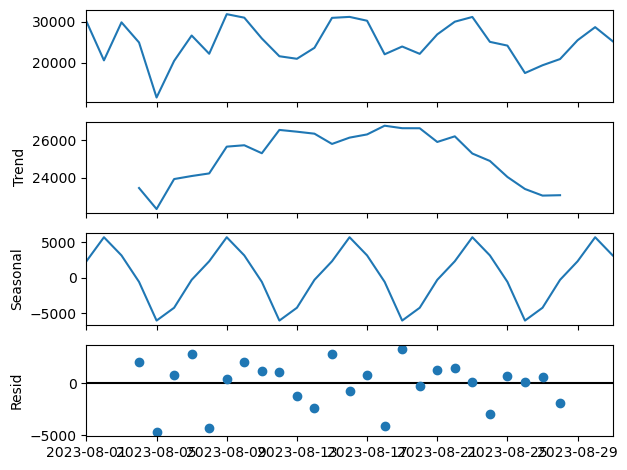

Start date
2023-08-01    2307.200680
2023-08-02    5677.867347
2023-08-03    3127.962585
2023-08-04    -584.418367
2023-08-05   -6013.846939
Freq: D, Name: seasonal, dtype: float64


In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='additive')

# Plot decomposition
decomposition.plot()
plt.show()

# Access the seasonality component
seasonality = decomposition.seasonal
print(seasonality.head())

# 1. Implement ADF test to check for stationarity or non stationarity

###  Augmented Dickey-Fuller (ADF) Test in Time Series

The Augmented Dickey-Fuller (ADF) Test is a statistical test used to determine whether a time series is **stationary**, which means its statistical properties (mean, variance, autocorrelation) remain constant over time. Stationarity is a critical assumption for many time series models, such as ARIMA.



###  Purpose of the ADF Test

The ADF test helps identify the presence of a **unit root** in a time series. A unit root indicates that the series is non-stationary and exhibits a stochastic trend. If the test concludes that there is no unit root, the series can be treated as stationary.



### Key Components of the ADF Test

1. **Null Hypothesis (\(H_0\))**:
   - The series has a unit root (i.e., it is non-stationary).

2. **Alternative Hypothesis (\(H_a\))**:
   - The series does not have a unit root (i.e., it is stationary).

3. **Test Statistic**:
   - The ADF test calculates a test statistic and compares it to critical values from the Dickey-Fuller distribution.



### Interpreting ADF Test Results

1. **P-Value Approach**:
   - If the p-value is less than the chosen significance level (e.g., 0.05), reject \(H_0\): the series is stationary.
   - If the p-value is greater, fail to reject \(H_0\): the series is non-stationary.

2. **Critical Value Comparison**:
   - Compare the test statistic with the critical values. If the test statistic is more negative than the critical value, reject \(H_0\).

In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(time_series_data)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])
print("Stationary:", adf_test[1] < 0.05)  # True if p-value < 0.05


ADF Statistic: -1.2359988590036368
p-value: 0.6579214495264071
Critical Values: {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}
Stationary: False


In [10]:
x=time_series_data.values
x

array([30055, 20622, 29822, 24950, 11638, 20489, 26633, 22220, 31797,
       30950, 25919, 21618, 21004, 23659, 30905, 31139, 30208, 22095,
       23972, 22199, 26908, 29974, 31121, 25099, 24193, 17560, 19437,
       20941, 25496, 28658, 25246], dtype=int64)

In [21]:
#Augmented dickey fuller test
test_result=adfuller(x)
print('ADF Statistic : %f' % test_result[0])
print('p-value : %f' % test_result[1])

print('Critical Values:')
for key,value in test_result[4].items():
    print('\t%s : %.3f' % (key,value))
    
    
     
if test_result[0] < test_result[4]["5%"]:
    print("Reject Null Hypothesis means given time series is stationary")
else:
    print("Failed to reject Null Hypothesis means given time series is Non-stationary")

ADF Statistic : -1.235999
p-value : 0.657921
Critical Values:
	1% : -3.724
	5% : -2.986
	10% : -2.633
Failed to reject Null Hypothesis means given time series is Non-stationary


# Implement ARMA model

### **ARIMA in Time Series**

**ARIMA (Autoregressive Integrated Moving Average)** is a widely used statistical model for analyzing and forecasting time series data. It combines three key components— AR (Autoregressive), I (Integrated), and MA (Moving Average)—to model time series that may exhibit trends and autocorrelation.


### **Components of ARIMA**

1. **Autoregressive (AR)**:
   - Captures the relationship between a value and its past values (lags).
   - Represented by the parameter ( p ), the number of lagged terms included.

2. **Integrated (I)**:
   - Refers to differencing the data to make it stationary.
   - Represented by the parameter ( d ), the number of times the series is differenced.

3. **Moving Average (MA)**:
   - Captures the relationship between a value and past error terms (residuals).
   - Represented by the parameter ( q ), the number of lagged residuals included.


### **ARIMA Notation**
The ARIMA model is expressed as:
 [ARIMA(p, d, q)]
- ( p ): Number of AR terms.
- ( d ): Degree of differencing.
- ( q ): Number of MA terms.

For example, ( ARIMA(2, 1, 1) ) includes two autoregressive terms, one differencing operation, and one moving average term.
ARIMA(1,0,1) means it contains no differencing rather only AR and MA part which togetherly make up ARMA model.

---

### **Steps to Build an ARIMA Model**

1. **Check Stationarity**: 
   - Use visualizations or statistical tests (e.g., ADF test) to ensure stationarity. Apply differencing if needed.

2. **Parameter estimation**:
   - Use auto arima to estimate p,d,q or sepcify (p,0,q).

3. **Fit the Model**:
   - Train the ARIMA model with chosen parameters.

4. **Evaluate Model**:
   - Use metrics like AIC, BIC, or residual diagnostics to assess model fit.

5. **Forecast**:
   - Use the model to make predictions for future time periods.


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARMA model (ARMA(p, q) where p and q are orders of AR and MA terms)
arma_model = ARIMA(time_series_data, order=(2, 0, 2)).fit()

# Summary of the model
print(arma_model.summary())

# Predict future values
predictions = arma_model.predict(start=len(time_series_data), end=len(time_series_data)+10)
print(predictions)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -298.854
Date:                Wed, 04 Dec 2024   AIC                            609.709
Time:                        14:53:24   BIC                            618.313
Sample:                    08-01-2023   HQIC                           612.513
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.505e+04    723.946     34.601      0.000    2.36e+04    2.65e+04
ar.L1          1.2324      0.062     19.722      0.000       1.110       1.355
ar.L2         -0.9994      0.007   -148.926      0.0

# Plot the original and predicted graph simultaneously

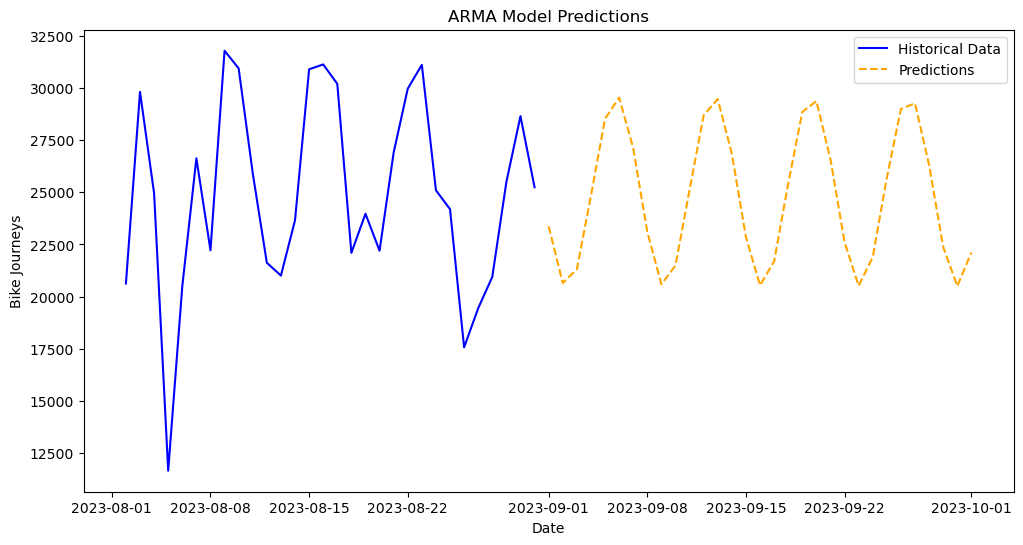

In [13]:
import matplotlib.pyplot as plt

# Predict future values
predictions = arma_model.predict(start=len(time_series_data), end=len(time_series_data)+30)

# Combine historical data with predictions
historical_data = time_series_data[-30:]  # Last 30 days of historical data for context
predicted_index = predictions.index

# Plot historical data
plt.figure(figsize=(12, 6))
plt.plot(historical_data, label="Historical Data", color="blue")
plt.plot(predicted_index, predictions, label="Predictions", color="orange", linestyle="--")

# Add labels and legend
plt.title("ARMA Model Predictions")
plt.xlabel("Date")
plt.ylabel("Bike Journeys")
plt.legend()
plt.show()


# ACF and PACF plots

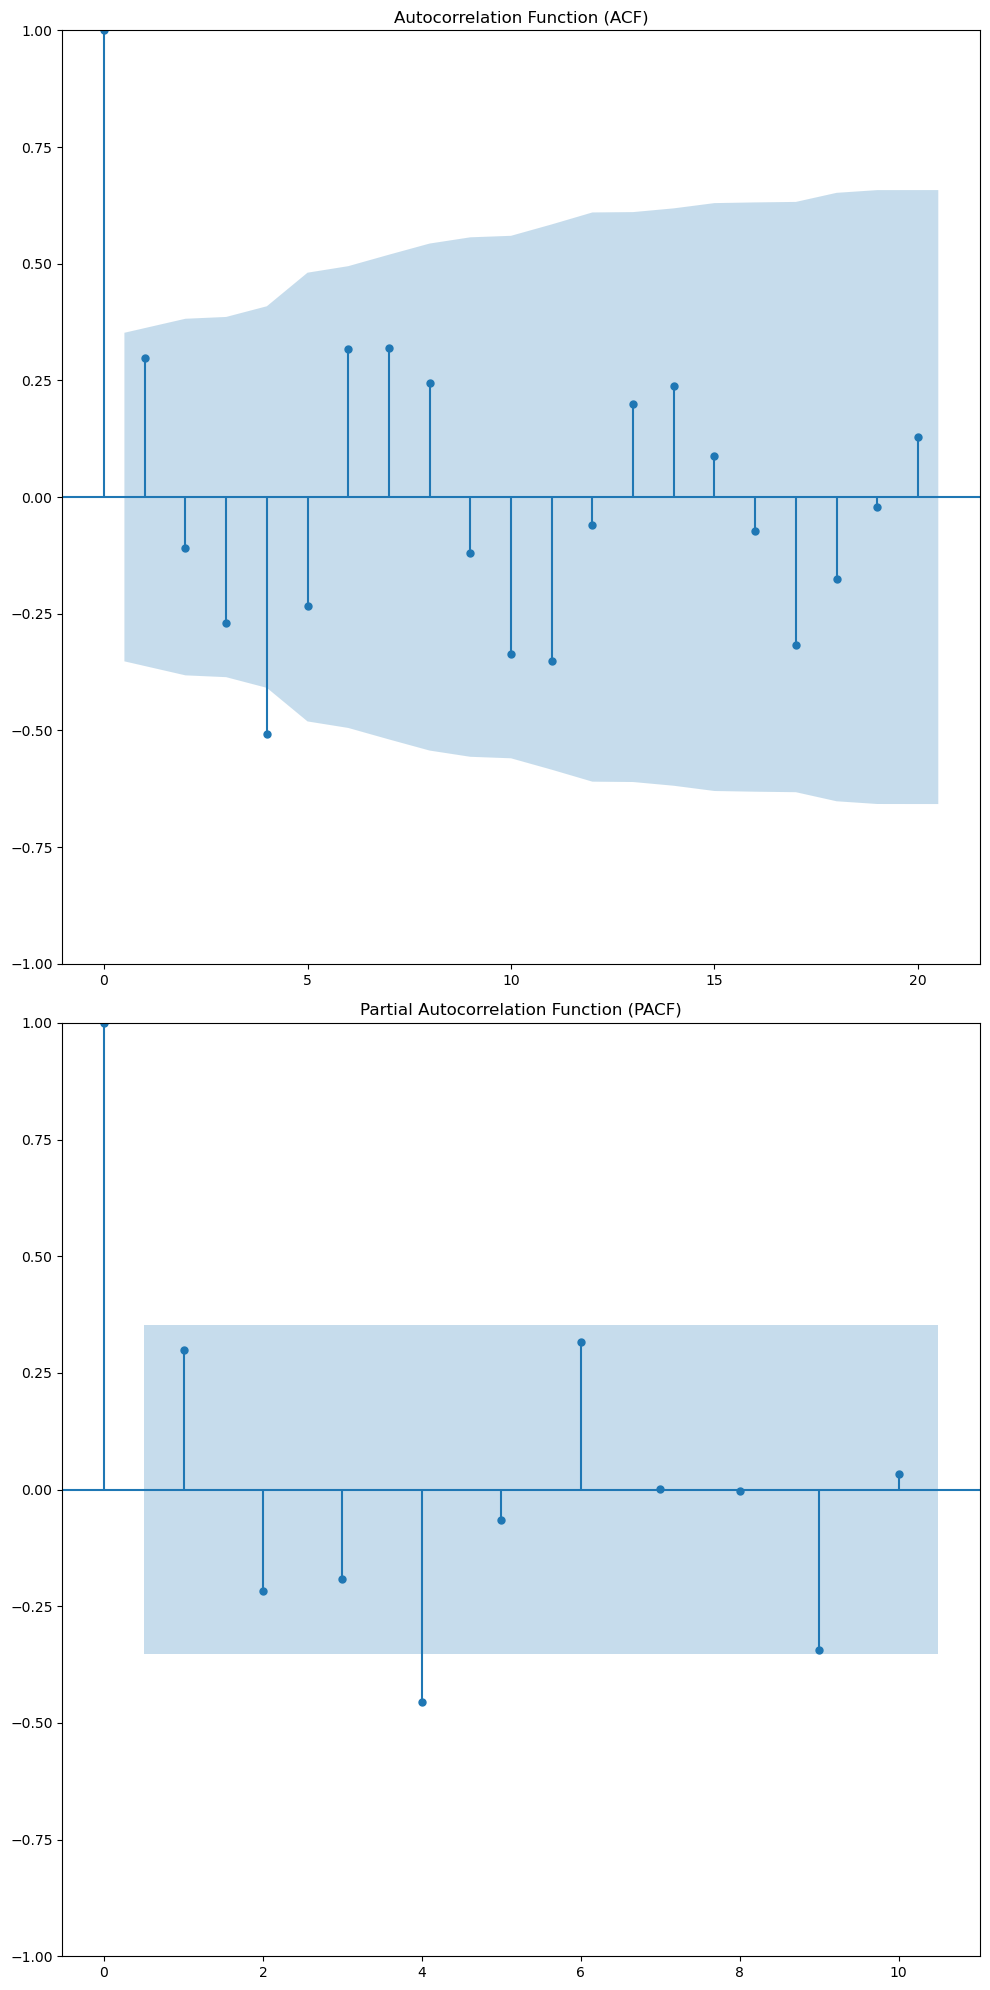

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with larger vertical size (increase height)
plt.figure(figsize=(10, 20))  

# ACF Plot
plt.subplot(211)
plot_acf(time_series_data, lags=20, ax=plt.gca()) 
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(212)
plot_pacf(time_series_data, lags=10, ax=plt.gca())  
plt.title('Partial Autocorrelation Function (PACF)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Akaike Information Criterion (AIC)

###  Akaike Information Criterion (AIC)

The AIC is designed to evaluate a model's quality based on the likelihood function while penalizing complexity (number of parameters). It is calculated as:
\[
AIC = -2 \ln(L) + 2k
\]
Where:
- \( \ln(L) \): Log-likelihood of the model (how well the model fits the data).
- \( k \): Number of estimated parameters.

**Key Features:**
- Lower AIC values indicate a better-fitting model.
- AIC focuses more on model fit than simplicity, often selecting more complex models.


In [14]:
print("AIC:", arma_model.aic)


AIC: 609.7087629429824


# Bayesian Information Criterion (BIC)

###  Bayesian Information Criterion (BIC)

The BIC also evaluates model quality but applies a stronger penalty for complexity. It is calculated as:
\[
BIC = -2 \ln(L) + k \ln(n)
\]
Where:
- \( n \): Number of observations in the dataset.

**Key Features:**
- Like AIC, lower BIC values indicate a better model.
- BIC tends to favor simpler models, as the penalty for additional parameters increases with sample size.



In [15]:
print("BIC:", arma_model.bic)


BIC: 618.3126861698933


# Implement Auto Regressive model (AR)

### **Autoregressive (AR) Model in Time Series**

An **Autoregressive (AR) model** is a fundamental approach in time series analysis that predicts future values based on a linear combination of past observations. It assumes that the current value of the series depends on its own previous values, making it suitable for data with strong temporal dependencies.




### **Key Characteristics**

1. **Order (( p ))**:
   - Refers to the number of lagged terms included in the model.

2. **Stationarity**:
   - The series must be stationary (mean, variance, and autocorrelation constant over time) for the AR model to work effectively.

3. **Autocorrelation**:
   - The AR model captures the relationship between the series' values and their own lags.


In [16]:
# Fit an autoregressive (AR) model
ar_model = ARIMA(time_series_data, order=(2, 0, 0)).fit()

# Summary of the AR model
print(ar_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -303.839
Date:                Wed, 04 Dec 2024   AIC                            615.678
Time:                        14:58:25   BIC                            621.414
Sample:                    08-01-2023   HQIC                           617.548
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.505e+04    992.418     25.241      0.000    2.31e+04     2.7e+04
ar.L1          0.3857      0.243      1.588      0.112      -0.090       0.862
ar.L2         -0.2455      0.222     -1.104      0.2

# Implement Moving Average model (MA)

### **Moving Average (MA) Model in Time Series**

A **Moving Average (MA) model** is a time series model that predicts the current value of a series as a linear combination of past error terms (residuals). Unlike the Autoregressive (AR) model, which uses past values of the series, the MA model focuses on the influence of past shocks or noise.


### **Key Characteristics**

1. **Order (( q ))**:
   - Refers to the number of lagged error terms included in the model.

2. **Stationarity**:
   - MA models assume the series is stationary. Preprocessing (e.g., differencing) may be required for non-stationary data.

3. **Short Memory**:
   - The effect of shocks in an MA model dissipates after \( q \) time steps, as the influence of older error terms becomes negligible.


In [17]:
# Fit a moving average (MA) model
ma_model = ARIMA(time_series_data, order=(0, 0, 2)).fit()

# Summary of the MA model
print(ma_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -304.226
Date:                Wed, 04 Dec 2024   AIC                            616.451
Time:                        14:58:51   BIC                            622.187
Sample:                    08-01-2023   HQIC                           618.321
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.505e+04    893.475     28.036      0.000    2.33e+04    2.68e+04
ma.L1          0.3853      0.204      1.892      0.058      -0.014       0.784
ma.L2         -0.0923      0.184     -0.500      0.6

# Stationarity and differencing 

### **Stationarity in Time Series**

**Stationarity** refers to a property of a time series where its statistical characteristics, such as mean, variance, and autocorrelation, remain constant over time. Stationary series are crucial in time series analysis because many models, such as ARIMA, assume stationarity to make accurate forecasts.


### **Role of Differencing in Achieving Stationarity**

**Differencing** is a common method to transform a non-stationary series into a stationary one. It involves subtracting the value of a data point from its preceding value:
\[
\Delta y_t = y_t - y_{t-1}
\]

#### **How Differencing Works**
1. **Removes Trends**: Differencing eliminates linear trends by computing changes between consecutive observations.
2. **Stabilizes Variance**: Higher-order differencing (e.g., second differences) can address more complex patterns of non-stationarity.


### **When to Use Differencing**
1. **Dickey-Fuller Test**: If the test indicates non-stationarity, apply differencing.
2. **Visualization**: Examine plots of the series for trends or seasonality.

### **Importance of Differencing**
By achieving stationarity through differencing, time series models can perform better by focusing on the inherent patterns and relationships in the data rather than being misled by trends or changing variability.

In [18]:
# Differencing to make the series stationary
diff_data = time_series_data.diff().dropna()

# Re-run the ADF test
adf_test_diff = adfuller(diff_data)
print("ADF Statistic after differencing:", adf_test_diff[0])
print("p-value after differencing:", adf_test_diff[1])


ADF Statistic after differencing: -8.372850973819535
p-value after differencing: 2.6336497518659263e-13


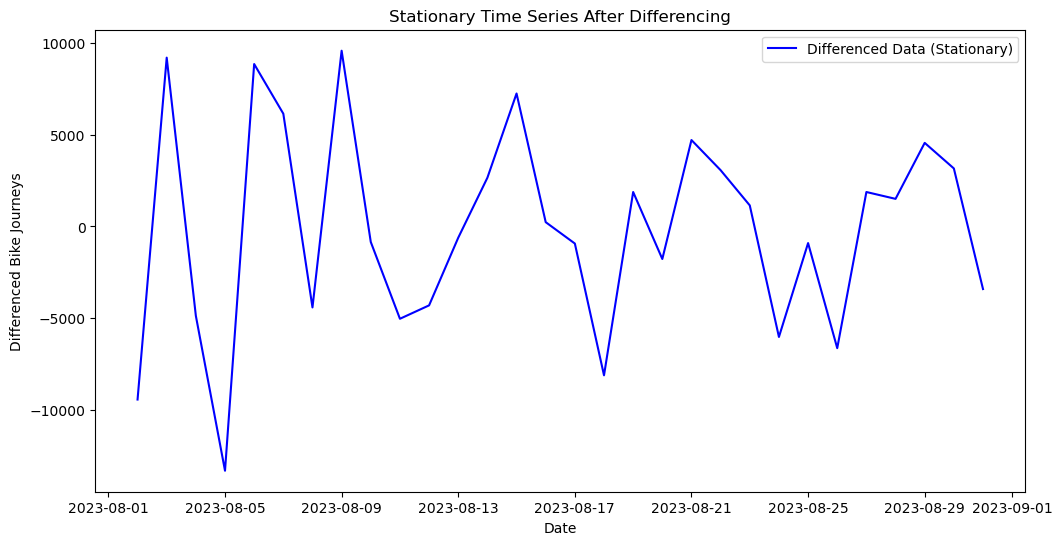

In [19]:
# Plot the differenced (stationary) time series
plt.figure(figsize=(12, 6))
plt.plot(diff_data, color='blue', label='Differenced Data (Stationary)')
plt.title('Stationary Time Series After Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Bike Journeys')
plt.legend()
plt.show()

# Predictions of time series dataset

In [20]:
# Predict using ARMA model (or another fitted model)
future_predictions = arma_model.forecast(steps=10)
print("Future Predictions:", future_predictions)


Future Predictions: 2023-09-01    23370.121360
2023-09-02    20647.624723
2023-09-03    21302.715120
2023-09-04    24830.794966
2023-09-05    28524.148954
2023-09-06    29550.048388
2023-09-07    27123.396354
2023-09-08    23107.540029
2023-09-09    20583.468696
2023-09-10    21486.061149
Freq: D, Name: predicted_mean, dtype: float64



# Summary of Time Series Analysis Steps and Results

---

## **1. Augmented Dickey–Fuller (ADF) Test Results**
The ADF test indicated that the original time series was **not stationary**:
- **ADF Statistic**: -1.236
- **p-value**: 0.658 (greater than 0.05 threshold)
- **Critical Values**: {'1%': -3.724, '5%': -2.986, '10%': -2.633}
- **Conclusion**: The null hypothesis of non-stationarity could not be rejected.

---

## **2. Differencing to Achieve Stationarity**
Differencing was applied to the time series to remove trends:


After differencing:
- **Visual Inspection**: The differenced data showed no visible trends or seasonality, suggesting stationarity.

---

## **3. Plot of Differenced Data**
The differenced time series was plotted:
- **X-axis**: Time (Dates)
- **Y-axis**: Differenced Bike Journeys
- The plot showed random fluctuations around zero, consistent with a stationary series.

---

## **4. Recommendations**
- **Use Stationary Data**: For ARMA or ARIMA modeling, always ensure the input data is stationary.
- **Re-test Stationarity**: After differencing, re-run the ADF test to confirm stationarity.

---

## **5. Next Steps**
- Fit ARMA or ARIMA models to the stationary data and make future predictions of bike usage in london for sept month.
- Evaluate model performance using metrics like AIC, BIC.
- Visualized the predictions alongside actual values to assess accuracy.
